<a href="https://colab.research.google.com/github/Ameen2488/Deep-Learning/blob/main/DMP__Task_BPE_fabuss_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import random
from sklearn.metrics import r2_score

In [2]:
df_bromley = pd.read_excel('/content/Bromley_data.xlsx')
df_bromley

,Salinity,BPT,TE
0,0.61860,60,0.071
1,0.63690,60,0.072
2,1.12630,60,0.128
3,1.17350,60,0.134
4,1.57070,60,0.178
5,1.68670,60,0.192
6,2.22542,60,0.258
7,3.05420,60,0.356
8,3.73500,60,0.440
9,4.52850,60,0.542


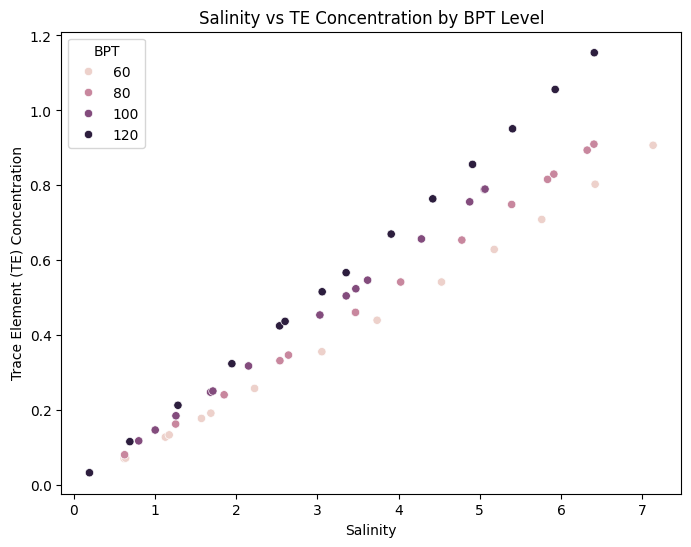

In [3]:
# @title Salinity vs TE Concentration by BPT Level

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salinity', y='TE', hue='BPT', data=df_bromley)
plt.xlabel('Salinity')
plt.ylabel('Trace Element (TE) Concentration')
_ = plt.title('Salinity vs TE Concentration by BPT Level')

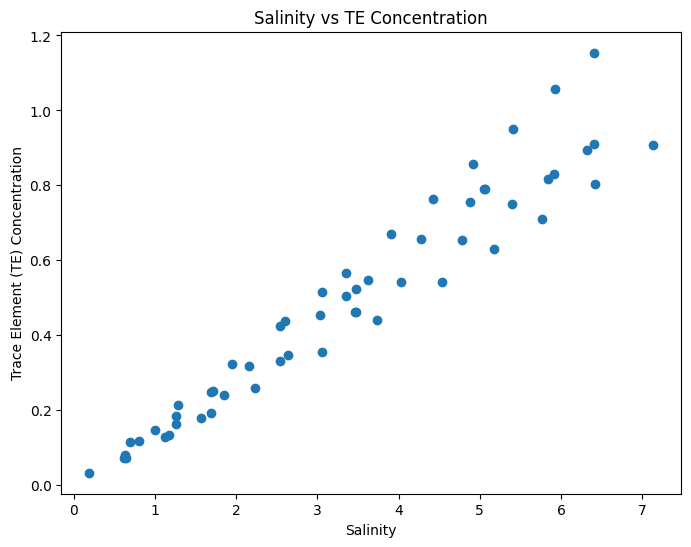

In [4]:
# @title Salinity vs TE Concentration

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_bromley['Salinity'], df_bromley['TE'])
plt.xlabel('Salinity')
plt.ylabel('Trace Element (TE) Concentration')
_ = plt.title('Salinity vs TE Concentration')

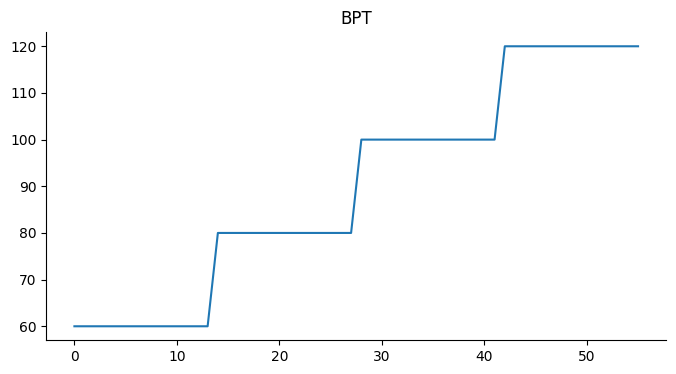

In [5]:
# @title BPT

from matplotlib import pyplot as plt
df_bromley['BPT'].plot(kind='line', figsize=(8, 4), title='BPT')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
df_bromley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salinity  56 non-null     float64
 1   BPT       56 non-null     int64  
 2   TE        56 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


In [7]:
df_badger = pd.read_excel('/content/Badger_data.xlsx')
df_badger

,Salinity,BPT,TE
0,0.88,37.8,0.07
1,1.76,37.8,0.14
2,2.64,37.8,0.17
3,3.53,37.8,0.28
4,4.41,37.8,0.38
...,...,...,...
63,11.46,121.1,2.36
64,12.37,121.1,2.64
65,13.21,121.1,2.81
66,14.10,121.1,2.99


In [8]:
# prompt: Using dataframe df_badger: scatter with BPT and TE and Salinity as a legend

import altair as alt
alt.Chart(df_badger).mark_point().encode(
    x='BPT',
    y='TE',
    color='Salinity'
)


alt.Chart(...)

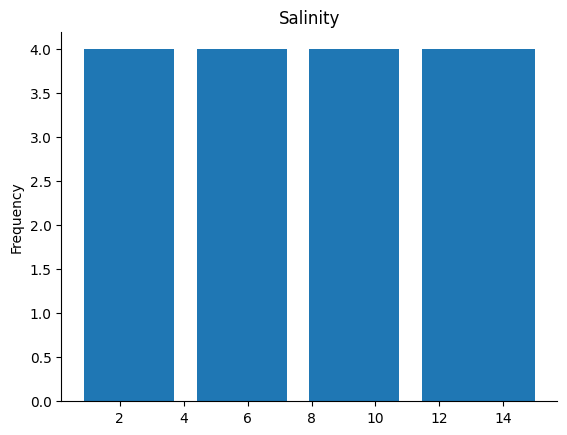

In [9]:
# @title Salinity

from matplotlib import pyplot as plt
df_badger['Salinity'].plot(kind='hist', bins=20, title='Salinity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df_fabuss = pd.read_excel('/content/Fabuss_data.xlsx')
df_fabuss

,Salinity,BPT,TE
0,1.5,20,0.118
1,1.5,30,0.131
2,1.5,40,0.144
3,1.5,50,0.157
4,1.5,60,0.170
...,...,...,...
331,13.0,110,2.627
332,13.0,120,2.765
333,13.0,130,2.902
334,13.0,140,3.041


In [11]:
# prompt: Using dataframe df_fabuss: scatter with BPT and TE and Salinity as a discreet legend point

import altair as alt
alt.Chart(df_fabuss).mark_point().encode(
    x='BPT ',
    y='TE',
    color='Salinity:N'  # Specify Salinity as a nominal (discrete) variable for the legend
)


alt.Chart(...)

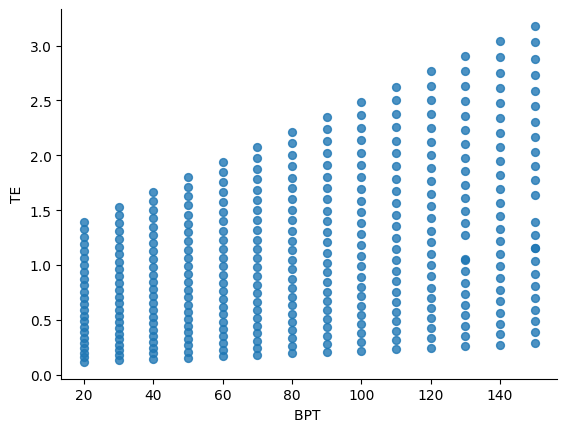

In [12]:
# @title BPT  vs TE

from matplotlib import pyplot as plt
df_fabuss.plot(kind='scatter', x='BPT ', y='TE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df_fabuss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salinity  336 non-null    float64
 1   BPT       336 non-null    int64  
 2   TE        336 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.0 KB


In [14]:
# Convert Pandas to Numpy

df_fabuss_np = df_fabuss.to_numpy()
df_fabuss_np

array([[1.500e+00, 2.000e+01, 1.180e-01],
       [1.500e+00, 3.000e+01, 1.310e-01],
       [1.500e+00, 4.000e+01, 1.440e-01],
       ...,
       [1.300e+01, 1.300e+02, 2.902e+00],
       [1.300e+01, 1.400e+02, 3.041e+00],
       [1.300e+01, 1.500e+02, 3.179e+00]])

In [15]:
df_fabuss_np.shape

(336, 3)

In [16]:
X = df_fabuss_np[:, 0:-1]
X

y = df_fabuss_np[:, 2:3]
y

array([[0.118 ],
       [0.131 ],
       [0.144 ],
       [0.157 ],
       [0.17  ],
       [0.183 ],
       [0.196 ],
       [0.209 ],
       [0.222 ],
       [0.235 ],
       [0.248 ],
       [0.261 ],
       [0.274 ],
       [0.287 ],
       [0.16  ],
       [0.177 ],
       [0.195 ],
       [0.212 ],
       [0.229 ],
       [0.247 ],
       [0.264 ],
       [0.282 ],
       [0.299 ],
       [0.317 ],
       [0.334 ],
       [0.352 ],
       [0.37  ],
       [0.387 ],
       [0.203 ],
       [0.225 ],
       [0.247 ],
       [0.269 ],
       [0.291 ],
       [0.313 ],
       [0.335 ],
       [0.357 ],
       [0.379 ],
       [0.401 ],
       [0.423 ],
       [0.445 ],
       [0.468 ],
       [0.49  ],
       [0.247 ],
       [0.274 ],
       [0.3   ],
       [0.327 ],
       [0.354 ],
       [0.38  ],
       [0.407 ],
       [0.434 ],
       [0.46  ],
       [0.487 ],
       [0.514 ],
       [0.541 ],
       [0.568 ],
       [0.595 ],
       [0.293 ],
       [0.324 ],
       [0.355 

In [17]:
print(X.shape)
print(y.shape)

(336, 2)
(336, 1)


In [18]:
random_seed = int( random.random()* 100 )

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, shuffle= None)

In [20]:
X_train.shape

(268, 2)

In [21]:
X_train

array([[ 13. ,  50. ],
       [  4.5,  40. ],
       [  7. , 120. ],
       [  8.5, 130. ],
       [ 10. ,  70. ],
       [  5. ,  50. ],
       [ 12.5, 140. ],
       [ 11.5,  80. ],
       [  8.5,  60. ],
       [  1.5,  60. ],
       [  8. ,  60. ],
       [  3.5,  70. ],
       [  8.5,  80. ],
       [ 11.5,  50. ],
       [  5. ,  30. ],
       [  7. ,  80. ],
       [  4.5,  20. ],
       [  9.5,  70. ],
       [ 10.5, 140. ],
       [  6. , 120. ],
       [  5. ,  40. ],
       [ 11. , 130. ],
       [  7. , 100. ],
       [  4. , 130. ],
       [  7. , 110. ],
       [ 11. , 150. ],
       [  2.5,  70. ],
       [  7.5, 150. ],
       [  9.5, 140. ],
       [ 12. ,  50. ],
       [  9. ,  90. ],
       [  2.5, 100. ],
       [  8. ,  30. ],
       [ 10. , 110. ],
       [ 11.5, 140. ],
       [ 12.5,  50. ],
       [  9.5,  40. ],
       [  3.5,  90. ],
       [  8. ,  50. ],
       [  8.5,  50. ],
       [  4. , 150. ],
       [  3.5,  50. ],
       [  9. , 110. ],
       [  9

In [22]:
y_train

array([[1.804 ],
       [0.47  ],
       [1.315 ],
       [1.734 ],
       [1.499 ],
       [0.575 ],
       [2.896 ],
       [1.899 ],
       [1.149 ],
       [0.17  ],
       [1.069 ],
       [0.449 ],
       [1.315 ],
       [1.545 ],
       [0.483 ],
       [1.047 ],
       [0.388 ],
       [1.408 ],
       [2.339 ],
       [1.103 ],
       [0.529 ],
       [2.361 ],
       [1.181 ],
       [0.738 ],
       [1.248 ],
       [2.588 ],
       [0.313 ],
       [1.643 ],
       [2.074 ],
       [1.63  ],
       [1.497 ],
       [0.379 ],
       [0.836 ],
       [1.902 ],
       [2.613 ],
       [1.716 ],
       [1.125 ],
       [0.512 ],
       [0.991 ],
       [1.066 ],
       [0.812 ],
       [0.387 ],
       [1.676 ],
       [0.965 ],
       [1.314 ],
       [1.142 ],
       [0.407 ],
       [1.098 ],
       [1.279 ],
       [0.933 ],
       [2.628 ],
       [2.215 ],
       [1.91  ],
       [0.487 ],
       [0.592 ],
       [0.593 ],
       [0.247 ],
       [0.896 ],
       [0.448 

In [23]:
X_train_tr = torch.from_numpy(X_train).float()
X_test_tr = torch.from_numpy(X_test).float()
y_train_tr = torch.from_numpy(y_train).float()
y_test_tr = torch.from_numpy(y_test).float()

In [24]:
y_test_tr.dtype

torch.float32

In [25]:
# Parameters

In [26]:
batch_size = 16
learning_rate = 0.001
num_epochs = 200

In [27]:
# Normalization

In [28]:
x_means = X_train_tr.mean(0, keepdim= True)
x_stds = X_train_tr.std(0, keepdim= True)

In [29]:
# Create a Dataloader

In [30]:
train_ds = TensorDataset(X_train_tr, y_train_tr)
test_ds = TensorDataset(X_test_tr, y_test_tr)

In [31]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size, shuffle=True)


In [32]:
# Neural Network Architechture

In [33]:
#Linear Regression

class LinRegNet(nn.Module):
    def __init__(self, x_means, x_stds):
      super().__init__()

      self.x_means = x_means
      self.x_stds = x_stds

      self.fc1 = nn.Linear(2, 1)

    ## perform inference
    def forward(self, x):

      x = (x - self.x_means) / self.x_stds
      y_pred = self.fc1(x)
      return y_pred



In [34]:
# MLP: Multi layer Perceptron

class MLP_net(nn.Module):
    def __init__(self, x_means, x_stds):
      super().__init__()

      self.x_means = x_means
      self.x_stds = x_stds

      self.fc1 = nn.Linear(2, 12)
      self.act1 = nn.ReLU()
      self.fc2 = nn.Linear(12, 1)

    ## perform inference
    def forward(self, x):

      x = (x - self.x_means) / self.x_stds
      x = self.fc1(x)
      x = self.act1(x)
      y_pred = self.fc2(x)
      return y_pred

In [35]:
# Deep Learning with 2 hidden layers

class DL_net(nn.Module):
    def __init__(self, x_means, x_stds):
      super().__init__()

      self.x_means = x_means
      self.x_stds = x_stds

      self.fc1 = nn.Linear(2, 12)
      self.act1 = nn.ReLU()
      self.fc2 = nn.Linear(12, 8)
      self.act2 = nn.ReLU()
      self.fc3 = nn.Linear(8, 1)

    ## perform inference
    def forward(self, x):

      x = (x - self.x_means) / self.x_stds
      x = self.fc1(x)
      x = self.act1(x)
      x = self.fc2(x)
      x = self.act2(x)
      y_pred = self.fc3(x)
      return y_pred

In [36]:
# Traning Loop

In [37]:
def train_loop(num_epochs, model, loss_fn, opt):
       for epoch in range(num_epochs):

         for xb, yb in train_dl:
          y_pred = model(xb)
          loss = loss_fn(y_pred, yb)

          opt.zero_grad()
          loss.backward()
          opt.step()

         if epoch % 10 == 0:
            print(epoch, "loss=", loss)

In [38]:
# Main Loop

In [39]:
#model = LinRegNet(x_means, x_stds)
#model = MLP_net(x_means, x_stds)
model = DL_net(x_means, x_stds)
loss_fn = nn.MSELoss()
opt = optim.Adam(model.parameters(), lr=learning_rate)
train_loop(num_epochs, model, loss_fn, opt)

0 loss= tensor(1.6262, grad_fn=<MseLossBackward0>)
10 loss= tensor(0.0184, grad_fn=<MseLossBackward0>)
20 loss= tensor(0.0083, grad_fn=<MseLossBackward0>)
30 loss= tensor(0.0037, grad_fn=<MseLossBackward0>)
40 loss= tensor(0.0034, grad_fn=<MseLossBackward0>)
50 loss= tensor(0.0029, grad_fn=<MseLossBackward0>)
60 loss= tensor(0.0015, grad_fn=<MseLossBackward0>)
70 loss= tensor(0.0017, grad_fn=<MseLossBackward0>)
80 loss= tensor(0.0014, grad_fn=<MseLossBackward0>)
90 loss= tensor(0.0006, grad_fn=<MseLossBackward0>)
100 loss= tensor(0.0005, grad_fn=<MseLossBackward0>)
110 loss= tensor(0.0006, grad_fn=<MseLossBackward0>)
120 loss= tensor(0.0004, grad_fn=<MseLossBackward0>)
130 loss= tensor(0.0006, grad_fn=<MseLossBackward0>)
140 loss= tensor(0.0009, grad_fn=<MseLossBackward0>)
150 loss= tensor(0.0010, grad_fn=<MseLossBackward0>)
160 loss= tensor(0.0012, grad_fn=<MseLossBackward0>)
170 loss= tensor(0.0006, grad_fn=<MseLossBackward0>)
180 loss= tensor(0.0006, grad_fn=<MseLossBackward0>)
190 

In [40]:
# Evaluate Model

In [41]:
y_pred_test = model(X_test_tr)

In [42]:
y_pred_test.shape

torch.Size([68, 1])

In [43]:
print("Testing R**2:", r2_score(y_test_tr.detach().numpy(), y_pred_test.detach().numpy()))

Testing R**2: 0.9990505156321086


In [44]:
list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
  print("*******************")
  print("pred, real")
  np_real = y_test_tr[i].detach().numpy()
  np_pred = y_pred_test[i].detach().numpy()
  print(np_pred[0], np_real[0])
  list_preds.append(np_pred[0])
  list_reals.append(np_real[0])

*******************
pred, real
0.9463639 0.937
*******************
pred, real
0.7799077 0.764
*******************
pred, real
0.25526693 0.248
*******************
pred, real
0.97626036 0.961
*******************
pred, real
0.28308102 0.324
*******************
pred, real
0.18025173 0.177
*******************
pred, real
2.5120184 2.502
*******************
pred, real
1.3924525 1.45
*******************
pred, real
2.0489063 2.034
*******************
pred, real
1.89855 1.902
*******************
pred, real
0.7842908 0.776
*******************
pred, real
2.966475 3.041
*******************
pred, real
1.2175851 1.27
*******************
pred, real
1.8435209 1.817
*******************
pred, real
0.2713244 0.269
*******************
pred, real
0.53413993 0.511
*******************
pred, real
0.551489 0.556
*******************
pred, real
1.3171809 1.349
*******************
pred, real
1.480783 1.482
*******************
pred, real
2.6244645 2.632
*******************
pred, real
0.23875569 0.229
**************

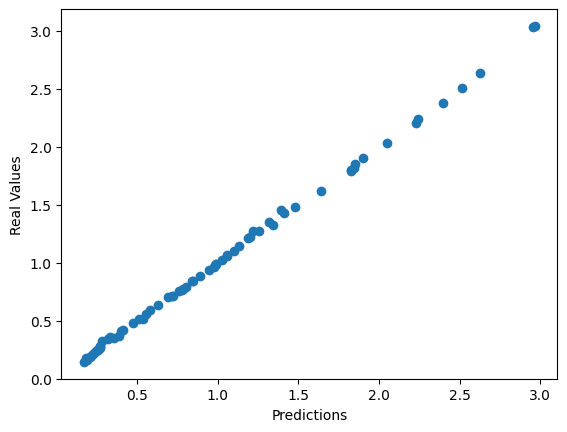

In [45]:
plt.scatter(list_preds, list_reals)
plt.xlabel("Predictions")
plt.ylabel("Real Values")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

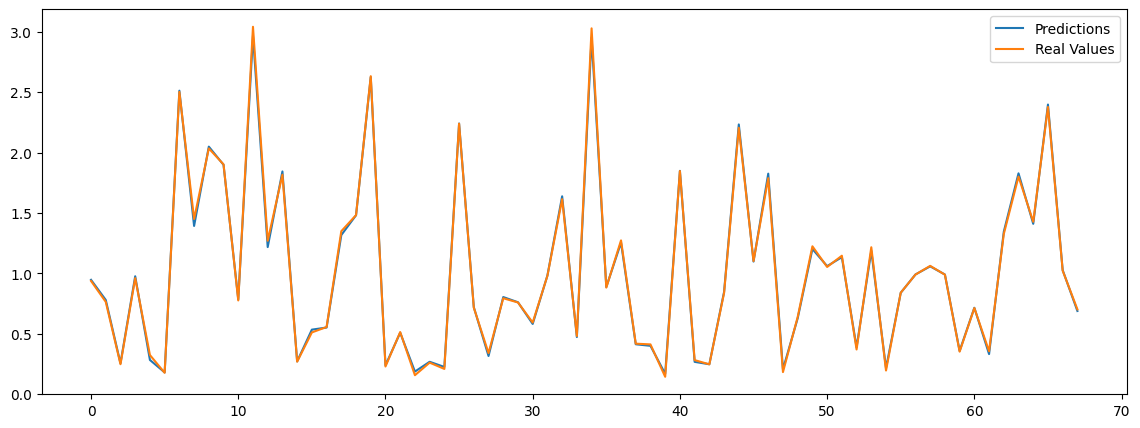

In [46]:
plt.figure(figsize=(14, 5))
plt.plot(list_preds, label="Predictions")
plt.plot(list_reals, label="Real Values")
plt.legend()
plt.show